# 基于Rudin-Osher-Fatemi模型的图像除模糊和除噪音新模型



In [19]:
import numpy as np
import numpy.linalg
from scipy.ndimage import filters
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import cv2
from scipy.ndimage import filters

In [12]:
img = imageio.imread('../datas/lena-noise.jpg')
imf = np.float32(img)

In [14]:
def rof_denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
        using the numerical procedure presented in Eq. (11) of A. Chambolle
        (2005). Implemented using periodic boundary conditions.
        
        Input: noisy input image (grayscale), initial guess for U, weight of 
        the TV-regularizing term, steplength, tolerance for the stop criterion
        
        Output: denoised and detextured image, texture residual. """
        
    m,n = im.shape #size of noisy image

    # initialize
    U = U_init
    Px = np.zeros((m, n)) #x-component to the dual field
    Py = np.zeros((m, n)) #y-component of the dual field
    error = 1 
    
    while (error > tolerance):
        Uold = U
        
        # gradient of primal variable
        GradUx = np.roll(U,-1,axis=1)-U # x-component of U's gradient
        GradUy = np.roll(U,-1,axis=0)-U # y-component of U's gradient
        
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx # non-normalized update of x-component (dual)
        PyNew = Py + (tau/tv_weight)*GradUy # non-normalized update of y-component (dual)
        NormNew = np.maximum(1,np.sqrt(PxNew**2+PyNew**2))
        
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)
        
        # update the primal variable
        RxPx = np.roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = np.roll(Py,1,axis=0) # right y-translation of y-component
        
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable
        
        # update of error
        error = np.linalg.norm(U-Uold)/np.sqrt(n*m);
        
    return U,im-U # denoised image and texture residual

In [15]:
U,T = rof_denoise(imf,imf)

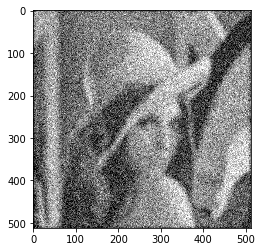

In [16]:
plt.imshow(img,'gray')

Text(0.5,1,'ROF')

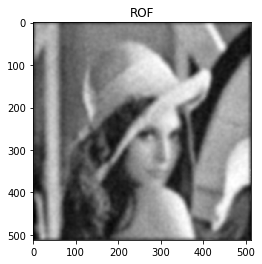

In [18]:
plt.imshow(U,'gray')
plt.title('ROF')

In [26]:
G = filters.gaussian_filter(imf,3)

Text(0.5,1,'Gaussian Filter')

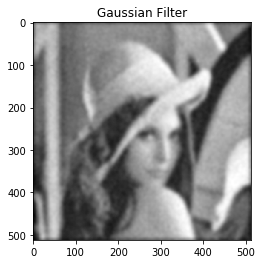

In [27]:
plt.imshow(G,'gray')
plt.title('Gaussian Filter')